# Car price Analysis

####  DONE BY: Ezra Bett


### Data understanding
`car_ID`- Unique identifier for each car in the dataset.

`symboling`-  Symbolic representation of the risk level associated with the car. It is often used for insurance purposes, where negative values indicate higher risk.

`CarName`- Name of the car model or brand.

`fueltype`- Type of fuel the car uses (e.g., gas or diesel).

`aspiration`- Refers to whether the car has a turbocharger (turbo) or not (std).

`doornumber` - Number of doors on the car.

`carbody`- Body style of the car (e.g., sedan, hatchback, convertible).

`drivewheel`- Type of drivetrain (e.g., front-wheel drive, rear-wheel drive, 4-wheel drive).

`enginelocation`- Location of the car's engine (e.g., front or rear).

`wheelbase`- Distance between the centers of the front and rear wheels.

`carlength, carwidth, carheight`- Dimensions of the car.

`curbweight`- Weight of the car without occupants or baggage.

`enginetype`- ype of engine (e.g., ohc, ohcf, ohcv).
            - 
`cylindernumber`- Number of cylinders in the engine.

`enginesize`- Displacement of the engine.

`fuelsystem`- type of fuel injection system.

`boreratio, stroke`- Parameters related to the engine's geometry.

`compressionratio`- Ratio of the volume of the cylinder at the bottom of the piston's stroke to the volume at the top.

`horsepower`- Power of the car's engine.

`peakrpm`- The engine's speed at which it generates maximum power. 

`citympg, highwaympg`- Miles per gallon (MPG) of the car in city and highway conditions, respectively.

`price`- The price of the car.

We have three data types in our data namely: object, float64 and int64

Below we import required libraries 

In [2]:
#importing libraries and modules
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
% matplotlib inline 


UsageError: Line magic function `%` not found.


### 1. Loading car data and transforming it into a DataFrame for analysis


In [3]:
cars =  pd.read_csv("data/CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 1.1 Data understanding and data wrangling
Here we familiarize with our data and perform some preprocessing steps such as dealing with missing values, duplicates, white spaces, outliers and any other step needed.

Below we get the dataframe summary information


In [4]:
#DF info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

From the information display we can see that our data entails object, float and interger data types. This can indicate presence of categorical, continous and ordinal values within the rows of our data frame. All coumns are complete and have zero missing values.

Doing summary statistics for numerical columns in our data

In [5]:
#summary statistics
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Checking for duplicates in our columns

In [6]:
#iterating through each column checking for duplicates
for column in cars.columns:
    duplicates = cars[column].duplicated()
    print(f"Column '{column}': {duplicates.any()} duplicates")


Column 'car_ID': False duplicates
Column 'symboling': True duplicates
Column 'CarName': True duplicates
Column 'fueltype': True duplicates
Column 'aspiration': True duplicates
Column 'doornumber': True duplicates
Column 'carbody': True duplicates
Column 'drivewheel': True duplicates
Column 'enginelocation': True duplicates
Column 'wheelbase': True duplicates
Column 'carlength': True duplicates
Column 'carwidth': True duplicates
Column 'carheight': True duplicates
Column 'curbweight': True duplicates
Column 'enginetype': True duplicates
Column 'cylindernumber': True duplicates
Column 'enginesize': True duplicates
Column 'fuelsystem': True duplicates
Column 'boreratio': True duplicates
Column 'stroke': True duplicates
Column 'compressionratio': True duplicates
Column 'horsepower': True duplicates
Column 'peakrpm': True duplicates
Column 'citympg': True duplicates
Column 'highwaympg': True duplicates
Column 'price': True duplicates


We shall not drop the duplicates because we are analyzing different models of cars made by different manufacturers. The duplicates can be accounted for by saying cars can have the same specifications although they are made independently by different car dealers. Dropping the duplicates might lead to losing a lot of data which we need for our analysis.
### 1.2 Checking for outliers
We will use boxplots to visualize the columns in order to understand where the data lies

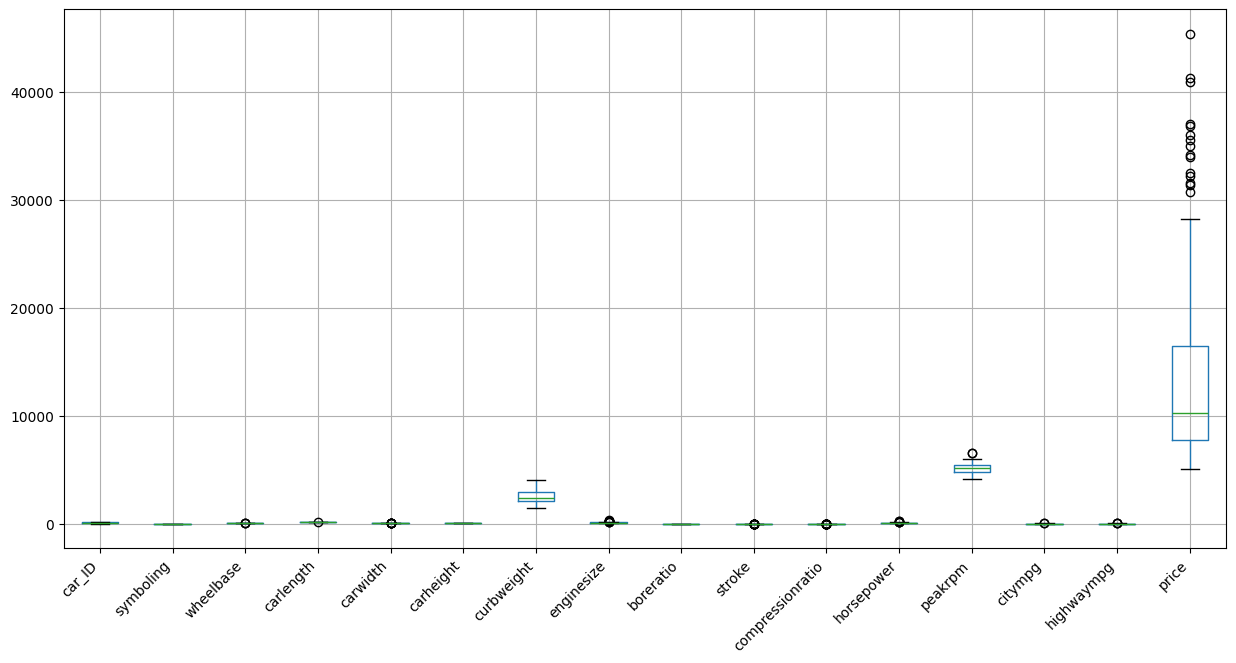

In [7]:
#plotting poxplots 
cars.boxplot(figsize = (15, 7))
plt.xticks(rotation = 45, ha = "right")
plt.show();
# sns.boxplot(data= cars)

From the visualization we can see that most columns have zero outliers while only two columns seem to have outliers that is `peakrpm`,  and `price`. We will further visualize these to have a closer look and understand them

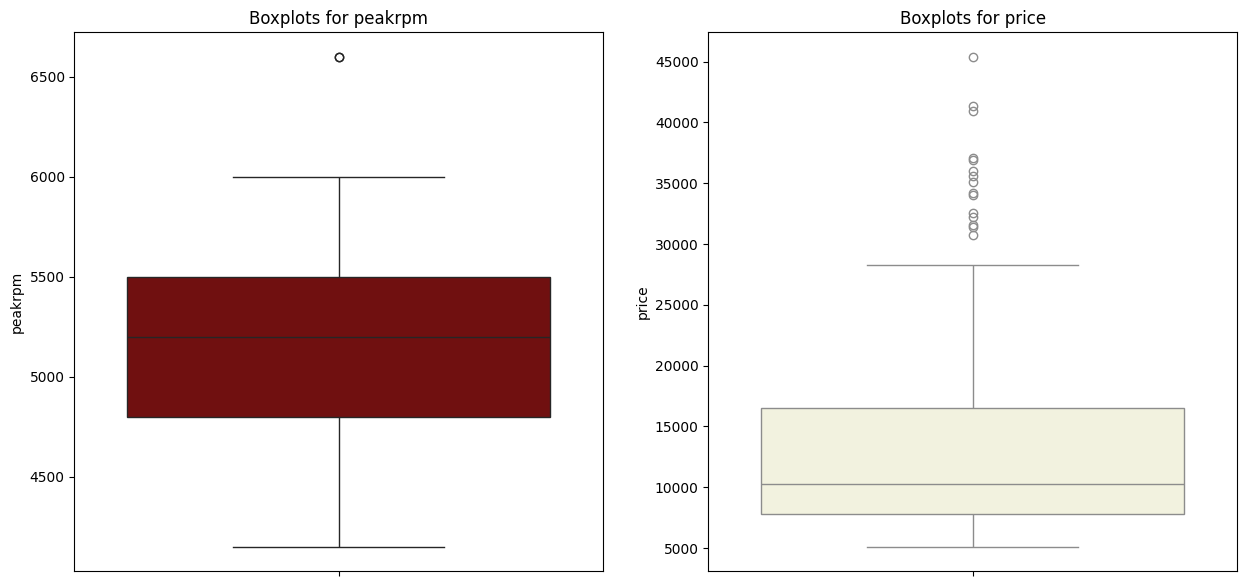

In [8]:
#plotting boxplots for peakrpm and price
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize = (15, 7))
sns.boxplot(cars["peakrpm"], ax= axes[0], color= "maroon")
axes[0].set_title("Boxplots for peakrpm")
sns.boxplot(cars["price"], ax= axes[1], color= "beige")
axes[1].set_title("Boxplots for price")
plt.show();

## 2. Exploratory Data Analysis
Here we are going to check for relationships between our columns using plots and graphs. We will also plot exploratory plots to help us further understand our data i.e Knowing which brand of cars was sold more . This analysis is also essential for our modelling stage since we will have already identify the columns that have linear relationship to our target.
### 2.1 Univariate analysis
Univariate analysis focuses on examining the distribution and characteristics of a single feature at a time. 
#### 2.1.1 Looking at the distribution of each column to understand the type of distribution


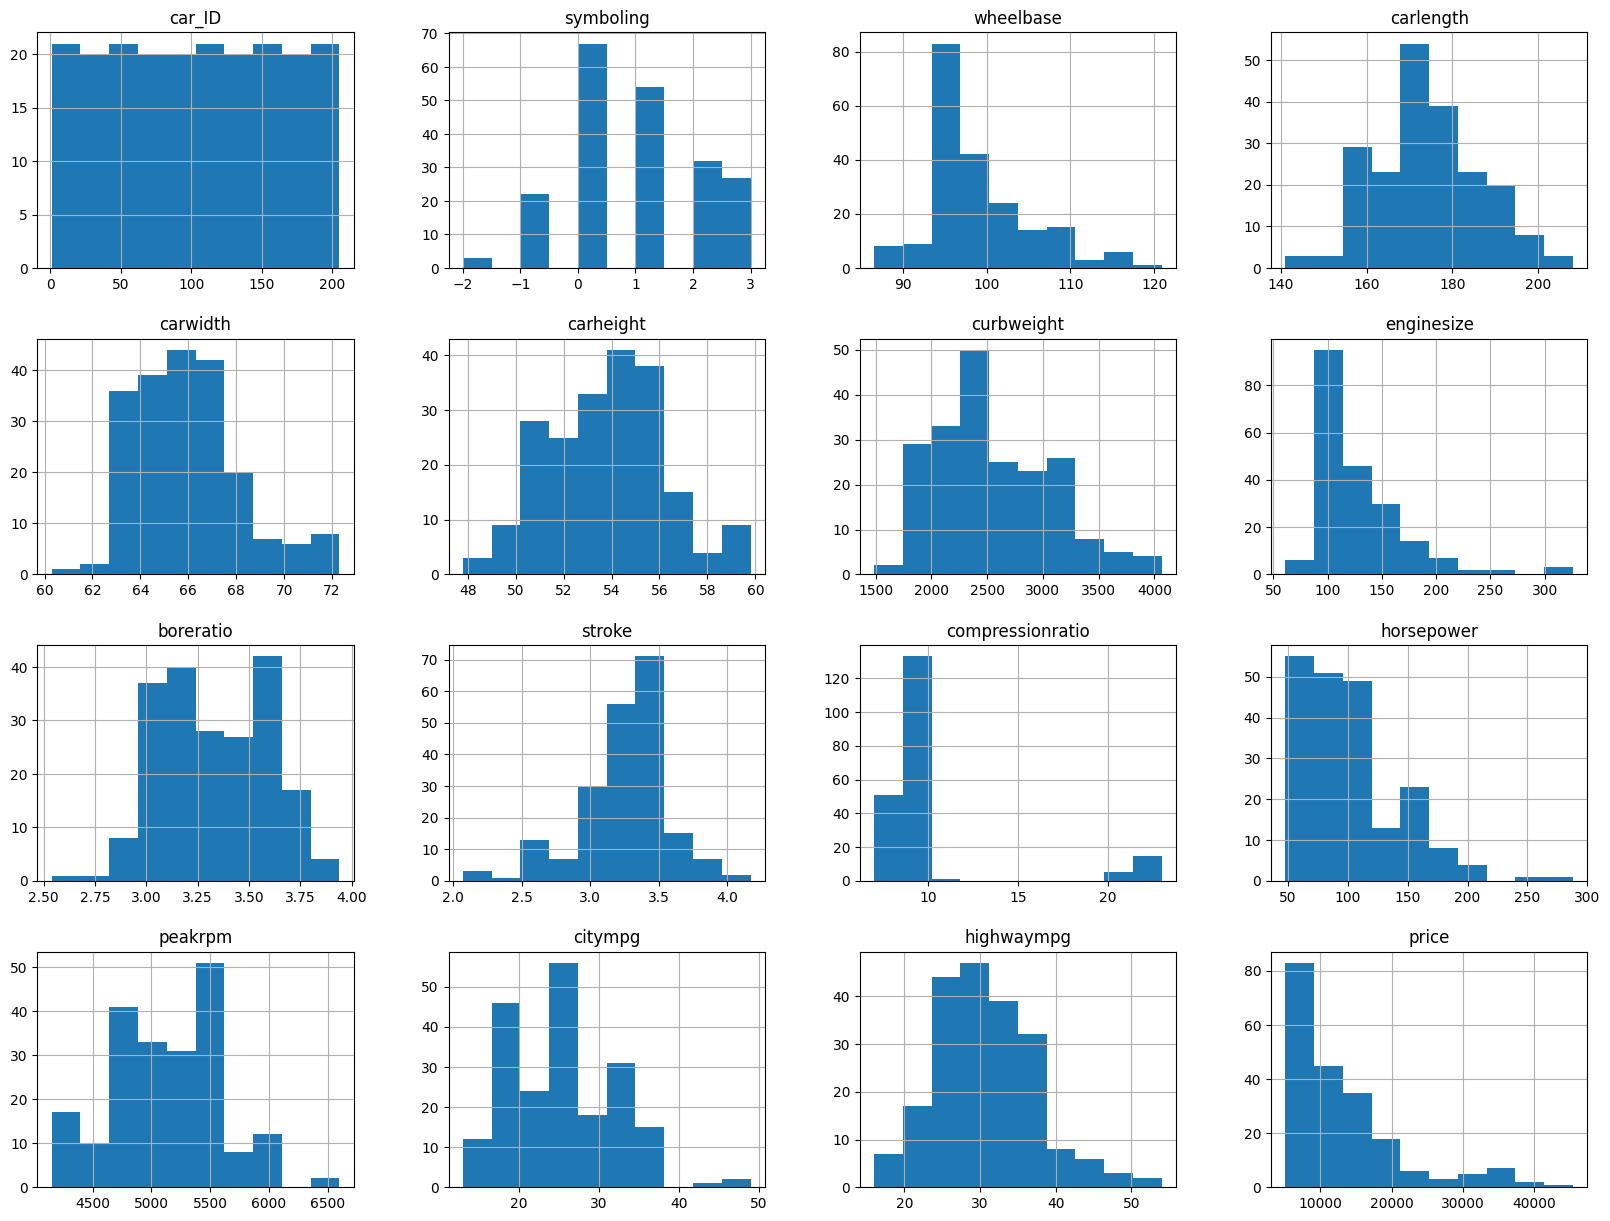

In [9]:
cars.hist(figsize=(20, 15))
plt.show();

From the above visuals we can see most columns almost follow a normal distribution. The variables that form a bell shape(or almost) curve indicates that they follow a  normal distribution. The other variables have their own unique distribution as well. Others have a positive skew while others have a negative skew.

### 2.1.2 Understanding the symboling column(scale of risk or insurance rating associated with the car)

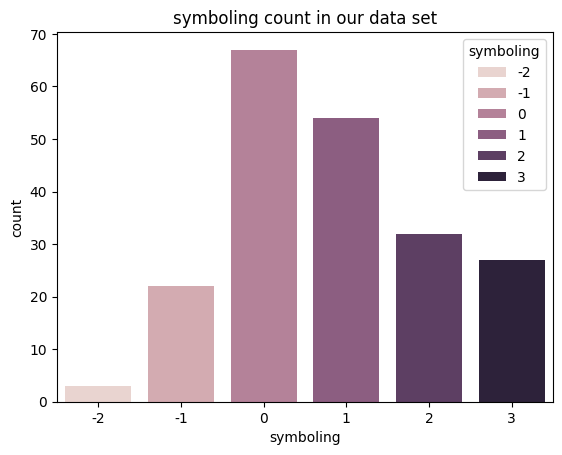

In [10]:
#visualizing symboling column
from functions import sns_xcount, sns_ycount
sns_xcount("symboling", cars)



From the symboling status that tells us the risk level associated with the car, we can see most cars have 0 risk level, few cars are prone to risks indicating a car that is perceived as riskier or more likely to be involved in accidents, leading to higher insurance premiums. And most cars have a positive scale and are considered less risky or more favorable in terms of insurance. A higher positive symboling might indicate a car that is seen as safer or less likely to be involved in accidents, leading to lower insurance premiums.
### 2.1.3 Visualizing the fuel type column

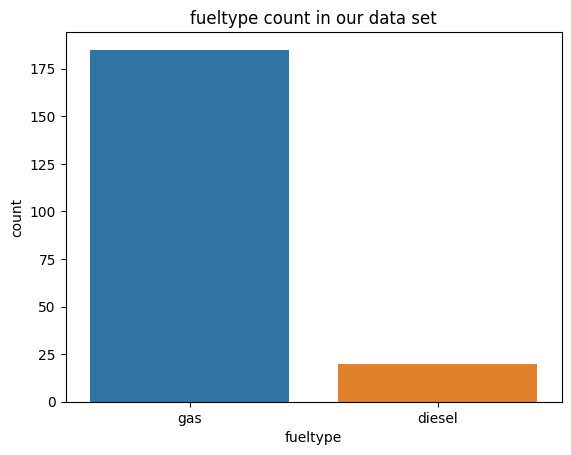

In [11]:
sns_xcount("fueltype", cars)

We have two types of fuel in our dataset. Most cars run on gas(petrol) and few cars run on diesel.
### 2.1.3 Inspecting the apiration column

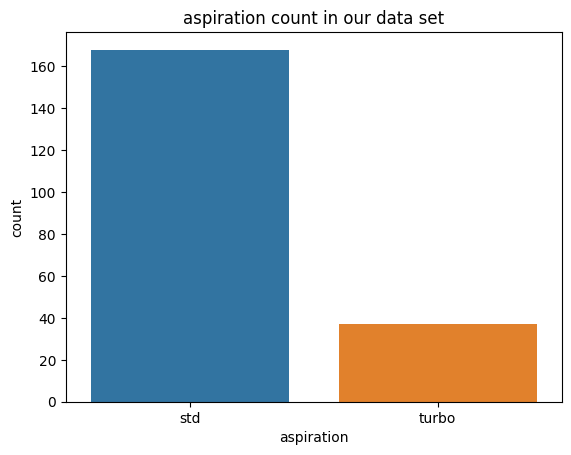

In [12]:
#plotting aspiration column
sns_xcount("aspiration", cars)

We have two aspiration categories the standard type and the turbo type. Most cars runs on engines with standard aspiration and this can indicate its pocket friendly compared to the turbo type which has low count of cars running on it.
### 2.1.4  Doornumber

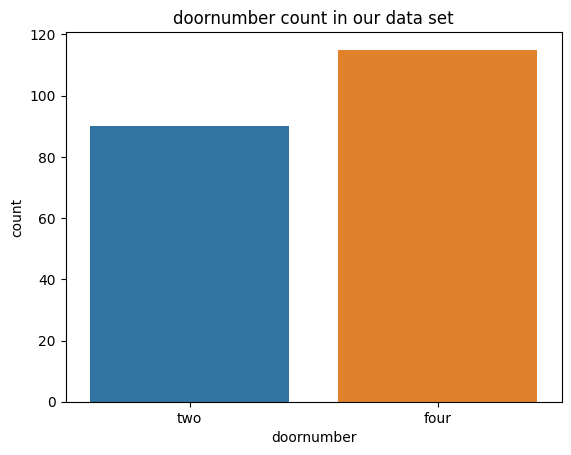

In [13]:
sns_xcount("doornumber", cars)

There are two doornumber categories. Most cars have four doors and two doors on them. The difference between the two is not that much. 
### 2.1.5 Carbody analysis

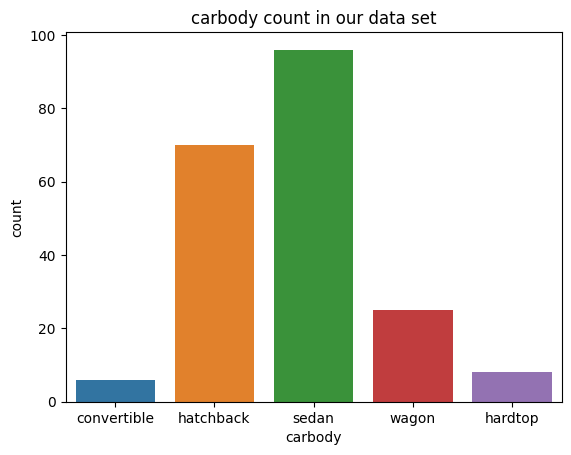

In [14]:
sns_xcount("carbody", cars)

There are 5 body styles  representing how cars are manufactured by automobiles. Sedan body type is the most style produced followed by hatchback and convertibles comes at last. This can indicate that sedan are pocket friendly and are mostly preferred by car owners. On the other hand  convertibles are less in count and can indicate it is quiet expensive to acquire and maintain one.
### 2.1.6 Drivewheel type

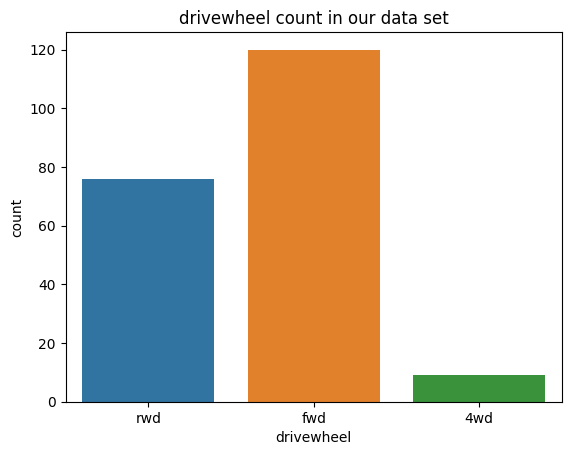

In [15]:
sns_xcount("drivewheel", cars)

Forward drivewheel has the highest count indicating it preferred by most car owners in the automobile word, rear drive comes in second and 4 wheel drive has the least count. The low count of 4 wheels may indicate it is expensive or most car owners live in towns hence do need off-road cars.
### 2.1.7 Engine location

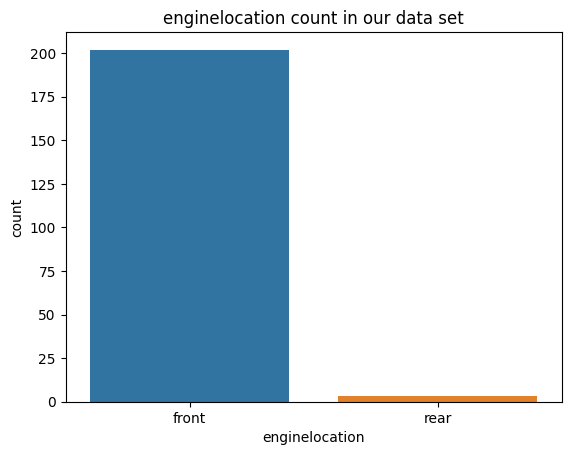

In [16]:
sns_xcount("enginelocation", cars)

Most automobile companies place the engine of the car on the front side and few of them place it in the rear.
### 2.1.8 Engine type

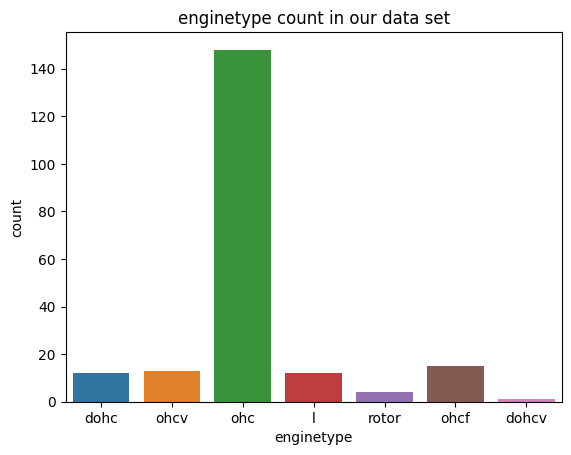

In [17]:
sns_xcount("enginetype", cars)

Overhead Camshaft(ohc) is the popular engine type preferred in the market compared to other engine varieties. This can communicate that this engine type is common and efficient than the rest.
### 2.1.9 Cylinder number

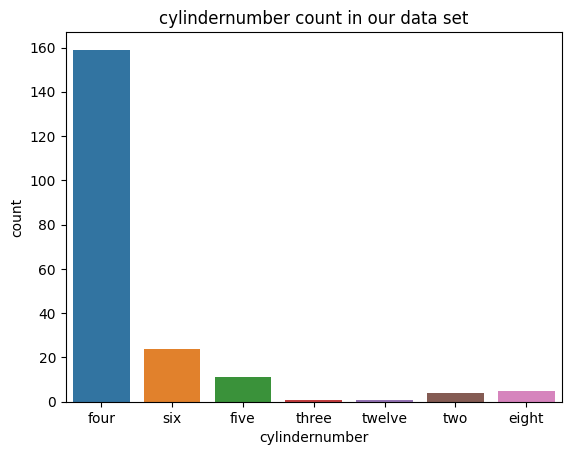

In [18]:
sns_xcount("cylindernumber", cars)

From the visual we see that we have 7 categories of cylindernumber. Four cylinders has the highest count and can indicate cars in these category is cheap and efficient in terms of fuel consumption. Cars with 8 and 12 cylinders are few and this tells us that the more the cylinders the more expensive a car becomes.
### 2.1.10 Fuel system

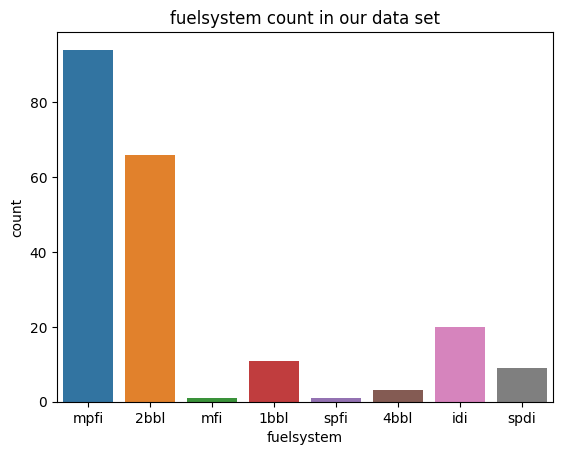

In [19]:
sns_xcount("fuelsystem", cars)

Multi-Point Fuel Injection(mpfi) is the common fuel system in this dataet. Such a system is often associated with more modern and efficient engines and are commonly found in newer vehicles. It seems we are dealing with a lot of modern cars in this data set
## 2.2 Bivariate exploratory analysis
This analysis involves the study of two variables simultaneously to determine if there is any relationship between them.
### 2.2.1 Relationship of our target column(price) with other columns
Here I am going to use scatter plots to get the underlying relationship between the columns with respect to price. 

In [20]:
# # #selecting numeric columns
# numeric_columns =  cars.select_dtypes(include= "number").columns
# # #creating subplots
# # fig, axes = plt.subplots(nrows= 4, ncols= len(numeric_columns), figsize = (15, 5))
# # for i, col in enumerate(numeric_columns):
# #     sns.scatterplot(x= col, y = "price", data= cars, ax= axes[i])
# #     axes[i].title(f"scatter_plot for {col}, against price")
# #     plt.tight_layout()
# #     plt.show();
    
# fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 5))

# for i, column in enumerate(numeric_columns):
#     sns.scatterplot(x=column, y='price', data= cars, ax=axes[i])
#     axes[i].set_title(f'Scatterplot: {column} vs. Price')

# plt.tight_layout()
# plt.show()

### 2.2.2 Checking the relationship between the categorical columns against the price

In [21]:
#importing helper function to draw boxplots and pointplots
from functions import box_pair_plot

### 2.2.3 Fueltype comparison with price

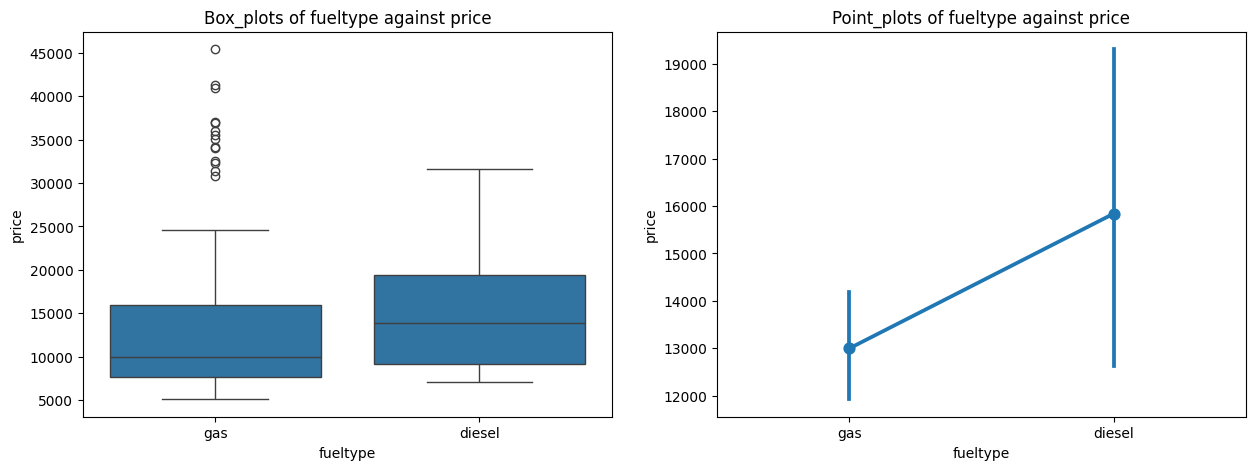

In [22]:
box_pair_plot("fueltype")

Diesel fuel cars has higher prices compared to petrol. This differences suggests that certain factors associated with diesel-fueled vehicles, such as their higher torque, fuel efficiency, or longer lifespan, contribute to their increased market value.
### 2.2.4 Apiration relation to price

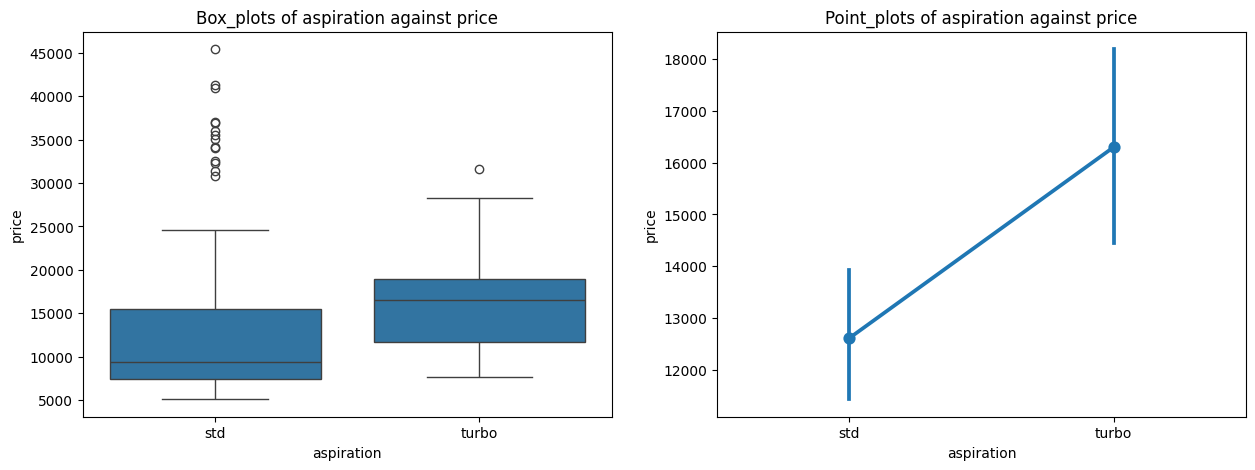

In [23]:
box_pair_plot("aspiration")


Cars with a turbo engine type are often perceived as more expensive than those with a standard (std) engine type due to the added performance benefits associated with turbocharging. Turbocharged engines typically provide higher power and efficiency, contributing to increased performance and driving experience. The additional engineering and technology required for turbocharging can lead to higher production costs, influencing the overall pricing of cars with turbo engines compared to standard engines.
### 2.2.5 Effect of doornumber on price

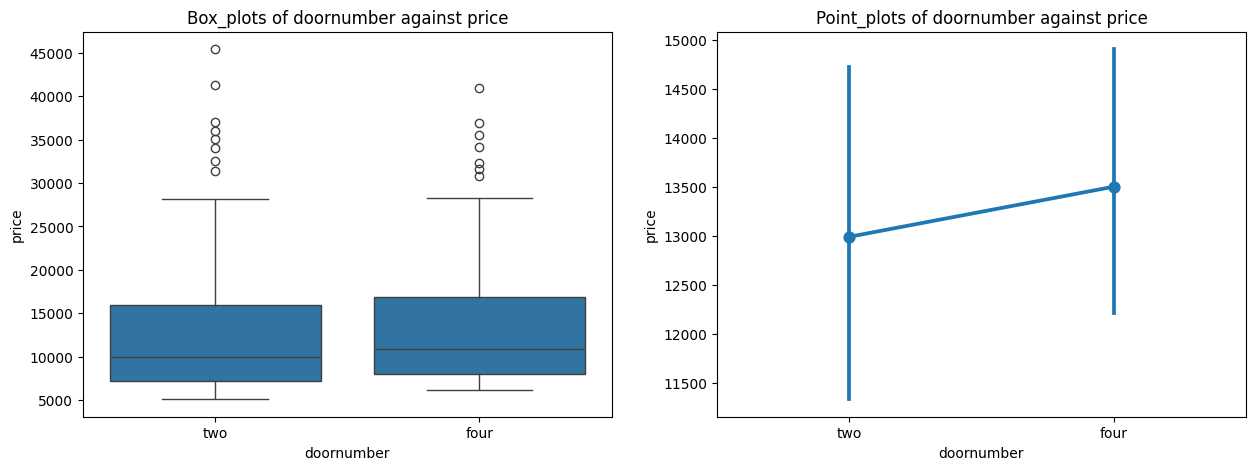

In [24]:
box_pair_plot("doornumber")

While there is slight difference in terms of price between the two, cars with 4 doors are pricy.  It's possible that specific models or brands with four-door configurations are positioned as more premium or offer additional features, contributing to higher prices. Four-door cars often come with additional features or options, such as increased interior space and convenience, which could justify a higher price point. Consumers may perceive four-door cars as more versatile and family-friendly, leading manufacturers to set slightly higher prices based on the perceived value
### 2.2.6 Body design relationship with price

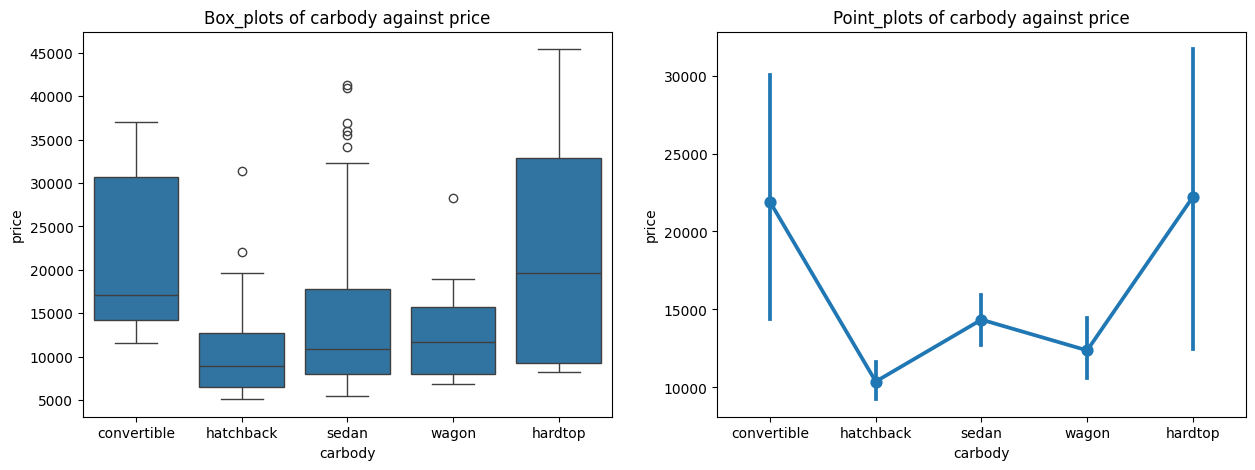

In [25]:
box_pair_plot("carbody")


Convertibles and hardtops are often priced higher than sedans, wagons, and hatchbacks due to their specialized design and engineering, which involves retractable roofs or structural enhancements. The manufacturing costs associated with the complexity of these features contribute to increased pricing. Additionally, convertibles and hardtops are often marketed as premium or luxury options, targeting consumers seeking a more stylish and sophisticated driving experience, which further influences their higher price points.
### 2.2.7 Price in relation to drivewheel

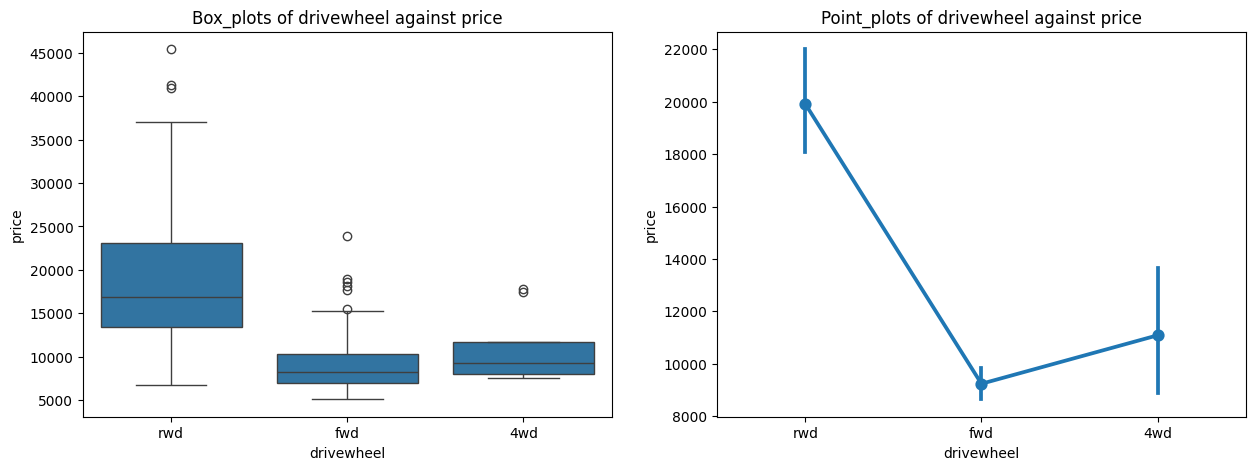

In [26]:
box_pair_plot("drivewheel")


Rear-wheel-drive (RWD) cars are often perceived as sportier and may require additional engineering for performance, contributing to higher production costs and pricing. Four-wheel-drive (4WD) systems, common in off-road and performance vehicles, also add complexity and cost. Front-wheel-drive (FWD) is generally considered more economical to manufacture, making it a cost-effective option
### 2.2.8 How engine position affects pricing

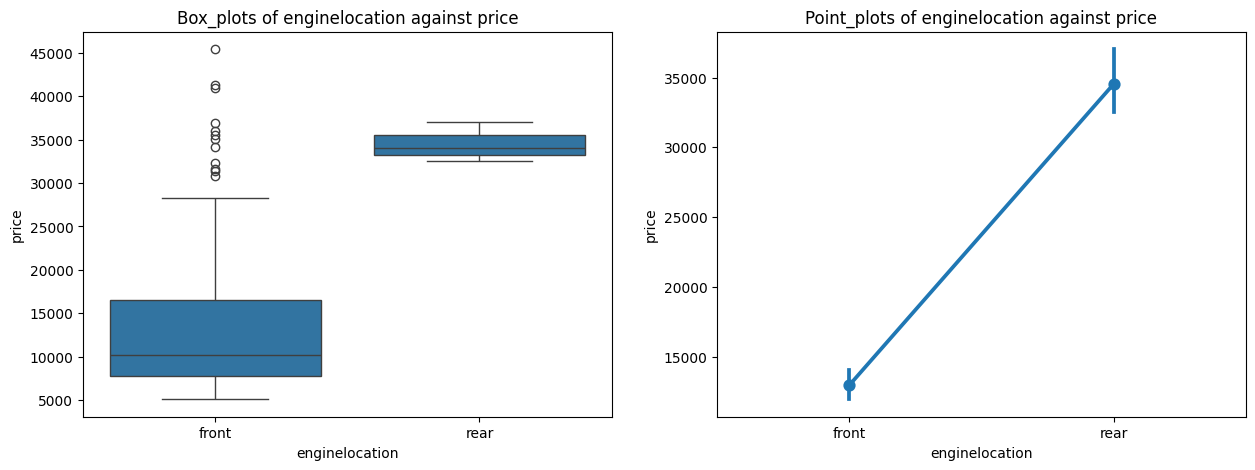

In [27]:
box_pair_plot("enginelocation")

Cars with rear-engine layouts are pricier due to specialized engineering, offering improved weight distribution and performance advantages. This configuration demands unique technology and design, increasing production costs. In contrast, front-engine cars are often more affordable as their conventional layout is less complex and requires standard manufacturing processes, catering to a broader market and affordability. The cost-effectiveness of front-engine designs contributes to their widespread use in a variety of vehicle segments.
### 2.2.9 How engine type relates to pricing

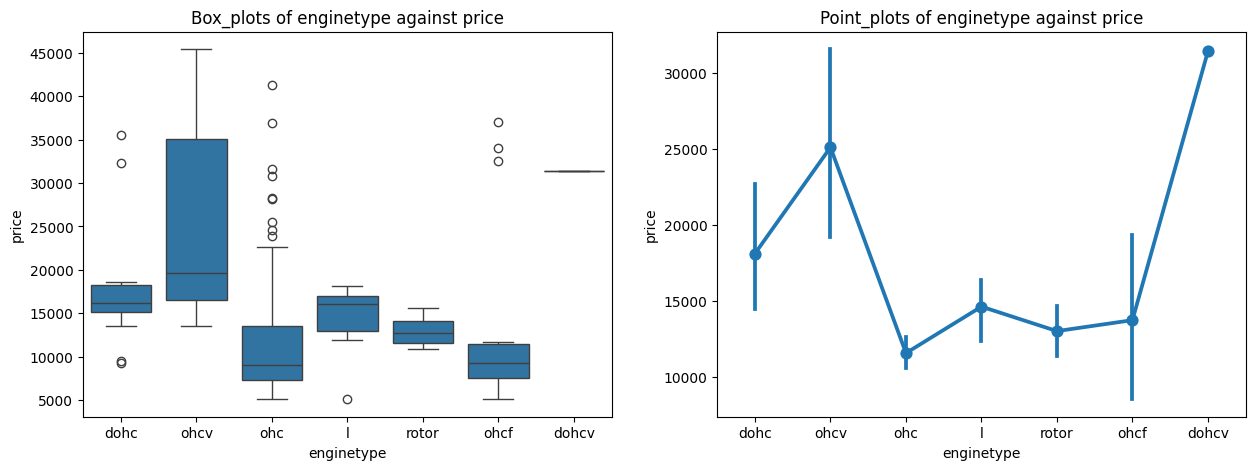

In [28]:
box_pair_plot("enginetype")


DOHCV, OHCV, and DOHC engine types are generally more expensive than OHC, L, rotor, and OHCF due to their advanced design, increased complexity, and precision engineering. Dual overhead camshafts (DOHC) allow for better control of valve timing and improved performance, contributing to higher manufacturing costs. Overhead camshaft variations (OHCV, DOHCV) further enhance efficiency but add to the production intricacy. In contrast, OHC, L, rotor, and OHCF engines are simpler in design, making them more cost-effective to produce and maintain, appealing to a broader market segment with budget considerations.
### 2.2.10 How number of cylinders affect pricing of a car

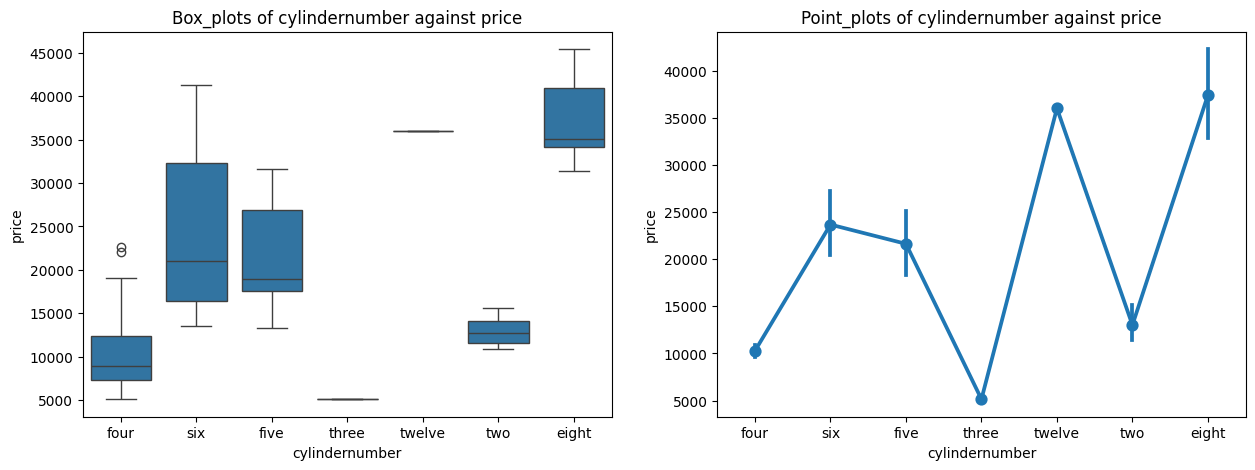

In [29]:
box_pair_plot("cylindernumber")

Cars with 12 and 8 cylinders are more expensive due to their larger engine sizes, higher power outputs, and premium performance characteristics. These engines require more materials and sophisticated engineering, contributing to elevated manufacturing costs. Vehicles with 6 or 5 cylinders offer a balance between performance and efficiency, making them relatively less expensive. Cars with 4 cylinders are often compact and fuel-efficient, appealing to a wider market, while those with 3 or 2 cylinders are smaller, lighter, and less powerful, resulting in lower production costs and affordability.
### 2.2.11 Pricing of cars in relation to fuelsystem of a car

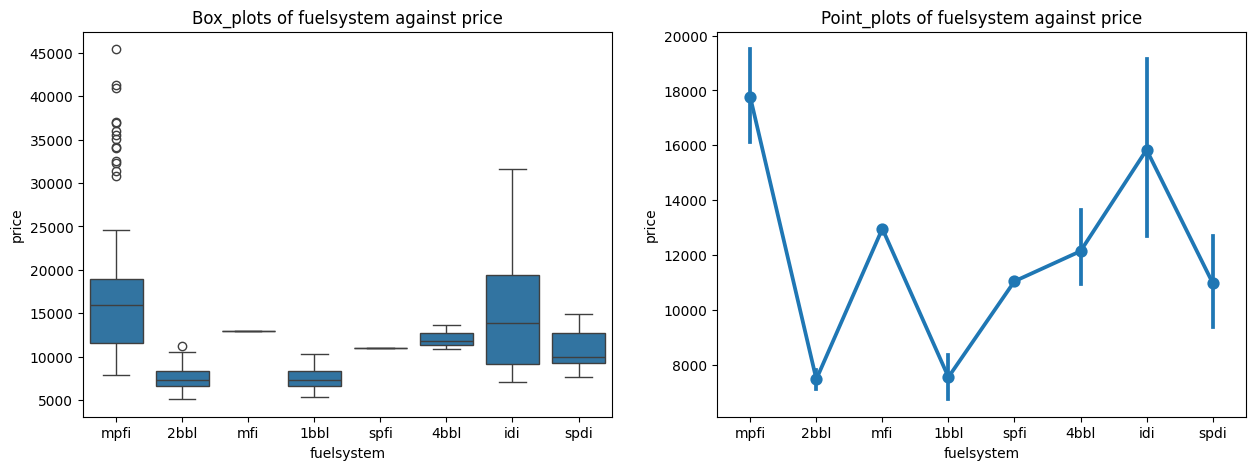

In [30]:
box_pair_plot("fuelsystem")


Multi-Point Fuel Injection (MPFI) is relatively expensive due to its advanced technology, providing precise fuel delivery to each cylinder for optimal performance. Indirect Diesel Injection (IDI) and Multi-Point Fuel Injection (MFI) share some complexity, impacting their costs. Single-Point Fuel Injection (SPFI), Four-Barrel Carburetors (4BBL), and Single-Point Diesel Injection (SPDI) are moderately priced, offering a balance between performance and cost. Two-Barrel Carburetors (2BBL) and One-Barrel Carburetors (1BBL) are simpler in design, making them more cost-effective for fuel systems, albeit at the expense of some efficiency and performance benefits
## 2.3 Multivariate exploratory analysis
Multivariate analysis involves the analysis of datasets with multiple variables to understand the relationships, patterns, and structures within the data. 
### 2.3.1 Checking the correlation of all the columns to price
For us to do that we will have to transform the categorical columns into numerical type and get rid of strings so that we can plot a correlation matrix. We can either create a mapper or use one hot encoding.

ValueError: could not convert string to float: 'alfa-romero giulia'

Learning data science to make  earth a better place. Solving fintech problems, automobile, smart weapons and gadgets
Join communities, work on my skills, network, perform online challenges, research
A senior ML AI engineer 

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1